# Log rank test

- log rank test는 두 집단 간에 유의미한 차이가 존재하는지를 확인하기 위해 사용되는 방법
- 각 그룹별로 통계적으로 유의미한 차이가 있는 지를 검정하는 작업을 통해 유의미성을 검증


In [1]:
import pandas as pd
data = pd.read_csv("Kaplan-Meier_Example_Dataset.csv")
data.head()

,time,event,group,gender
0,4.7,1,ESRD,female
1,30.1,1,cardiac,male
2,13.2,1,respiratory,female
3,9.1,1,respiratory,male
4,1.7,0,ESRD,female


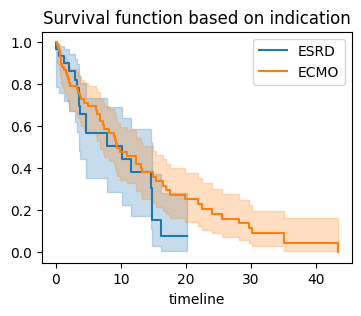

In [5]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# True 와 false 형태로 나타남
group_ESRD = (data['group'] == 'ESRD')
group_ECMO = ((data['group'] == 'cardiac') | (data['group'] == 'respiratory'))

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations = data[group_ESRD]['time'], 
        event_observed = data[group_ESRD]['event'],
        label = 'ESRD')
kmf.plot_survival_function(figsize = (4, 3), ax = ax)

kmf.fit(durations = data[group_ECMO]['time'],
        event_observed = data[group_ECMO]['event'],
        label = 'ECMO')
kmf.plot_survival_function(figsize = (4, 3), ax = ax)
plt.title("Survival function based on indication")
plt.show()


### log rank test를 수행하여 indication 그룹간에 차이가 존재하는지를 확인

In [8]:
from lifelines.statistics import logrank_test

# True 와 false 형태로 나타남
group_ESRD = (data['group'] == 'ESRD')
group_ECMO = ((data['group'] == 'cardiac') | (data['group'] == 'respiratory'))

output = logrank_test (durations_A = data[group_ESRD]['time'],
                       durations_B = data[group_ESRD]['time'],
                       event_observed_A = data[group_ESRD]['event'],
                       event_observed_B = data[group_ESRD]['event']
                       )

output.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.00 1.00     -0.00

# 

In [ ]:
# Gender
gender_male = data['gender']=='male'
gender_female = data['gender']=='female'

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations = data[gender_male]['time'], 
        event_observed = data[gender_male]['event'],
        label = 'male')
kmf.plot_survival_function(figsize = (4, 3), ax = ax)

kmf.fit(durations = data[gender_female]['time'], 
        event_observed = data[gender_female]['event'],
        label = 'female')
kmf.plot_survival_function(figsize = (4, 3), ax = ax)
plt.title("Survival function based on gender")
plt.show()